# Part1 数据预处理  
使用数据：Car_details_merged.csv  里面没有used_car.csv的数据 后续加

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
#导入数据
data = pd.read_csv('../Dataset/Full_dataset.csv')

In [3]:
data.head(5)

,Brand,Model,Year,Age,Kilometer,Fuel Type,Engine,Max Power,Transmission,Seats,Price
0,Acura,ILX 2.0L w/Premium Package,2013,12,318649,Petrol,2000.0,150,Automatic,5,917400
1,Acura,ILX 2.0L w/Premium Package,2015,10,120701,Petrol,2000.0,150,Automatic,5,1209300
2,Acura,ILX 2.4L,2016,9,219509,Petrol,2400.0,201,Manual,5,1234153
3,Acura,ILX Premium & A-SPEC Packages,2019,6,31382,Petrol,2400.0,201,Automatic,5,2085000
4,Acura,ILX Premium Package,2018,7,51917,Petrol,2400.0,201,Automatic,5,1751317


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12646 entries, 0 to 12645
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         12646 non-null  object 
 1   Model         12646 non-null  object 
 2   Year          12646 non-null  int64  
 3   Age           12646 non-null  int64  
 4   Kilometer     12646 non-null  int64  
 5   Fuel Type     12646 non-null  object 
 6   Engine        12478 non-null  float64
 7   Max Power     12646 non-null  object 
 8   Transmission  12646 non-null  object 
 9   Seats         12646 non-null  int64  
 10  Price         12646 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB


**brand和model不动*  
Max Power需要转换为数值型数据  
Transmission适合encode处理

In [5]:
#缺失值处理
data.isnull().sum()

Brand             0
Model             0
Year              0
Age               0
Kilometer         0
Fuel Type         0
Engine          168
Max Power         0
Transmission      0
Seats             0
Price             0
dtype: int64

In [6]:
#Engine 和 Max Power转化为数值型数据 
#方法参考 ：https://zhuanlan.zhihu.com/p/567458117
data['Max Power'] = pd.to_numeric(data['Max Power'], errors='coerce')

data['Max Power'] = data['Max Power'].astype(str)
data['Max Power'] = data['Max Power'].str.replace('bhp', '',case=False, regex=False)
data['Max Power'] = pd.to_numeric(data['Max Power'], errors='coerce')

data = data.dropna()
data.info()
# print(data.isnull().sum())
# TODO 取出带有缺失值的行，后续想办法处理/直接删除


<class 'pandas.core.frame.DataFrame'>
Index: 12474 entries, 0 to 12645
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         12474 non-null  object 
 1   Model         12474 non-null  object 
 2   Year          12474 non-null  int64  
 3   Age           12474 non-null  int64  
 4   Kilometer     12474 non-null  int64  
 5   Fuel Type     12474 non-null  object 
 6   Engine        12474 non-null  float64
 7   Max Power     12474 non-null  float64
 8   Transmission  12474 non-null  object 
 9   Seats         12474 non-null  int64  
 10  Price         12474 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.1+ MB


**Transmission 编码**  

In [7]:
print(data['Transmission'].unique())
data['Transmission_code'] = data['Transmission'].map({'Manual': 1, 'Automatic': 0})
print(data['Transmission_code'].value_counts())

['Automatic' 'Manual']
Transmission_code
1    7588
0    4886
Name: count, dtype: int64


**Fuel Type编码**

In [8]:
print(data['Fuel Type'].unique())
data['Fuel Type_code'] = data['Fuel Type'].map({'Diesel': 1,'Petrol': 0,'Other': 2})
print(data['Fuel Type_code'].value_counts())

['Petrol' 'Other' 'Diesel']
Fuel Type_code
0    7172
1    4784
2     518
Name: count, dtype: int64


In [39]:
#最终data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12474 entries, 0 to 12645
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12474 non-null  object 
 1   Model              12474 non-null  object 
 2   Year               12474 non-null  int64  
 3   Age                12474 non-null  int64  
 4   Kilometer          12474 non-null  int64  
 5   Fuel Type          12474 non-null  object 
 6   Engine             12474 non-null  float64
 7   Max Power          12474 non-null  float64
 8   Transmission       12474 non-null  object 
 9   Seats              12474 non-null  int64  
 10  Price              12474 non-null  int64  
 11  Transmission_code  12474 non-null  int64  
 12  Fuel Type_code     12474 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.3+ MB


# Part2 
可视化  
并进一步提高数据质量

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

**以里程数为例，分析数据质量并改进**

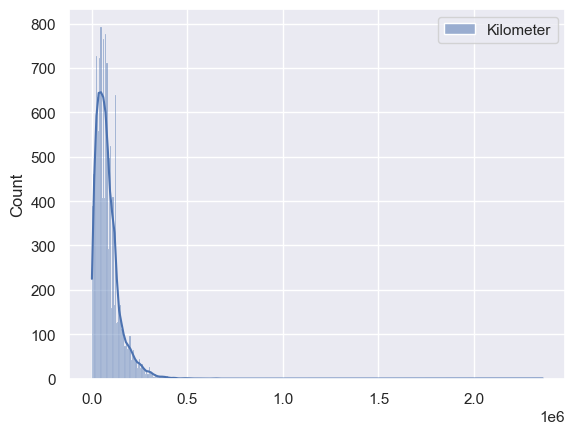

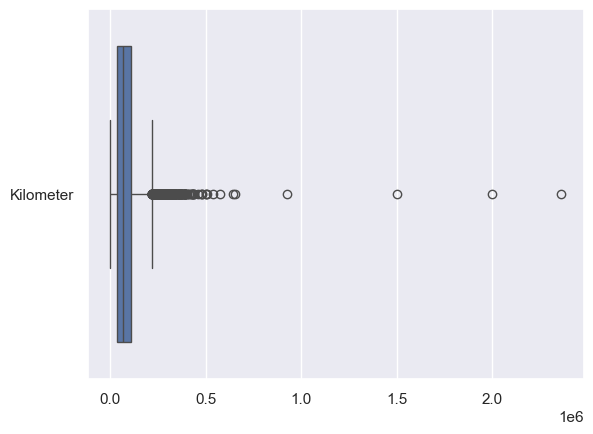

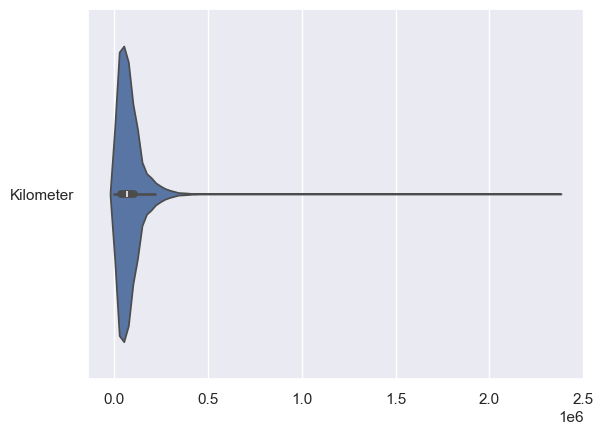

In [11]:
km = pd.DataFrame(data['Kilometer'])
#f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.histplot(km, kde=True)
plt.show()
sb.boxplot(data = km, orient = "h")
plt.show()
sb.violinplot(data=km,orient = "h")
plt.show()


In [12]:
from scipy.stats import skew,boxcox
skew(km)
#偏度

array([6.5742245])

很明显数据right-skewed严重，scipy中为我们提供了可以解决这一问题的方法  
尝试方法如下：1.Log 变换 2.Box-Cox变换  
最终选择box-cox变换

In [ ]:
km_log = np.log1p(km)
#f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.histplot(km_log, kde=True)
plt.show()
sb.boxplot(data = km_log, orient = "h")
plt.show()
sb.violinplot(data=km_log,orient = "h")
plt.show()
print("Log变换之后的偏度:",skew(km_log))

Box-Cox λ:0.3131


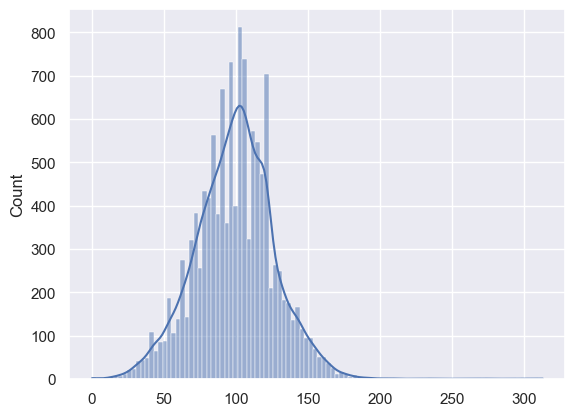

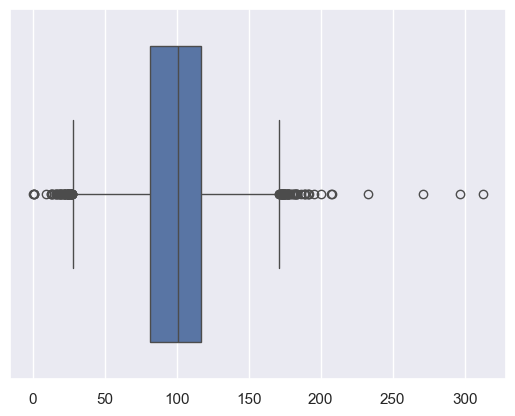

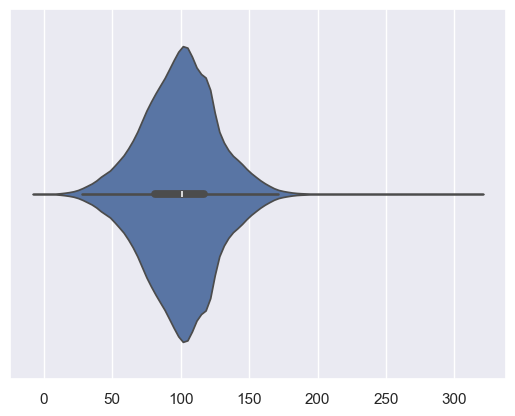

Boxcox变换之后的偏度: 0.04745017950698217


In [20]:
km = data['Kilometer'].dropna()
km_boxcox, lambda_bc = boxcox(km+1)
print(f"Box-Cox λ:{lambda_bc:.4f}")

sb.histplot(km_boxcox, kde=True)
plt.show()
sb.boxplot(data=km_boxcox, orient="h")
plt.show()
sb.violinplot(data=km_boxcox, orient="h")
plt.show()
print("Boxcox变换之后的偏度:",skew(km_boxcox))

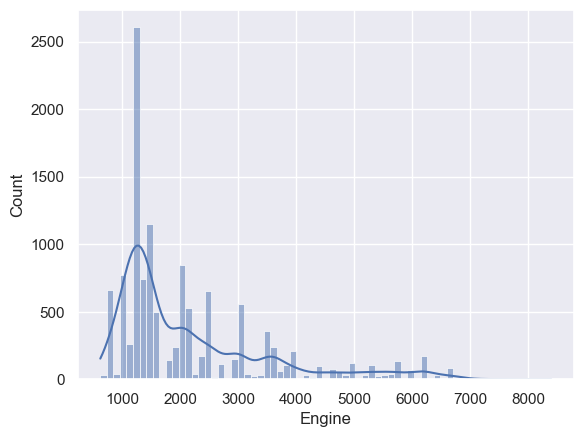

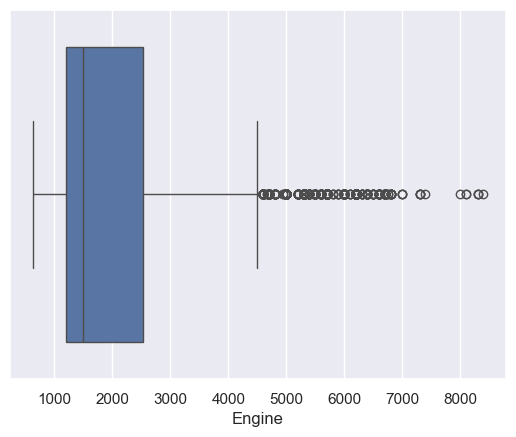

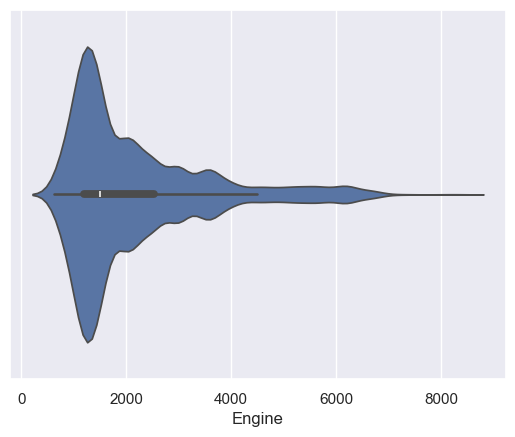

In [23]:
eg = data['Engine'].dropna()
#f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.histplot(eg, kde=True)
plt.show()
sb.boxplot(data = eg, orient = "h")
plt.show()
sb.violinplot(data=eg,orient = "h")
plt.show()
#engine数据做了log变换/box-cox后效果并不好

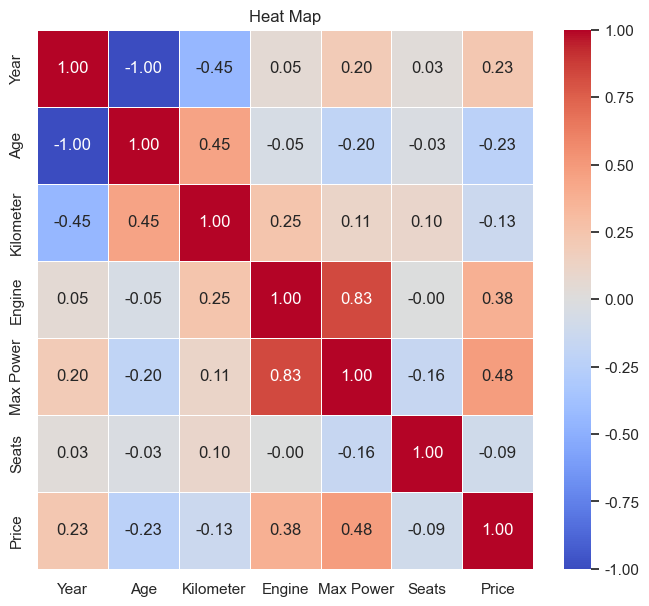

In [34]:
# heat map
corr_matrix = data[["Year","Age","Kilometer","Engine","Max Power","Seats","Price"]].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Heat Map')
plt.show()

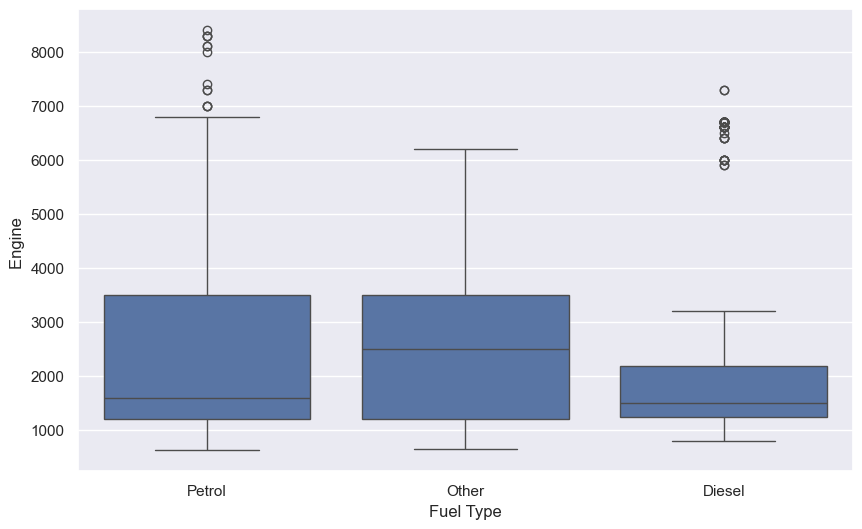

In [38]:
# 不同燃料类型下，engine箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Fuel Type', y='Engine')
plt.xlabel('Fuel Type')
plt.ylabel('Engine ')
plt.show()